### Import Required Models and Helper Classes

In [17]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")
%reload_ext autoreload
%autoreload 2
PROJECT_DIR = "/Users/raghav/envPython3/experiments/one_class_neural_networks/"
import sys,os
import numpy as np
sys.path.append(PROJECT_DIR)
from src.data.make_dataset import CreateDataSet
from src.models.fakeNoiseNN import FakeNoiseNN

## Create data for training and testing
createData = CreateDataSet()

## Signatures of the methods


### ===============================================================
get_TestingData: 
        returns-> 220 : 1s and 11: 7s

 get_TrainingData: 
        returns-> 220 : 1s

### ===============================================================

get_TestingData_With_Random_UniformNoise: 
        returns-> 220 : 1s and 220: URN( Uniform Random Noise)

get_FAKE_Noise_TrainingData
        returns-> 220 : URN

### ===============================================================


#### ===============================================================
### Experiment Setup


- for all methods, the test set is exactly the same (i.e., ones and sevens)

- for OCNN_FakeNoise, the training set does include uniform noise; what we do is treat these as negatives, and add a new term to the objective, which measures the hinge loss when making predictions for these fake points. This is almost exactly the same as the Keras FakeNN method, but instead of using cross-entropy loss, we use hinge-loss; and we additionally learn a parameter r, which controls the fraction of points predicted to be anomalous



In [18]:
## Obtaining the training and testing data
X_Pos,X_PosLabel = createData.get_TrainingData()
[Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= createData.get_TestingData()

StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)


## FAKE_NOISE_KerasBinaryClassifier

In [6]:


## Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_TrainingData(X_Pos)

## Create an Binary supervised classifier instance
clf_FakeNoiseNN =  FakeNoiseNN()
clf_FakeNoiseNN.fit(X_Pos,X_PosLabel,X_Neg,X_NegLabel)  ## fit takes Normal and FakeNoise concatenates before training
res = clf_FakeNoiseNN.predict(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)

Training the Keras Binary classifier.....
Train on 352 samples, validate on 88 samples
Epoch 1/1
352/352 [==============================] - 2s 6ms/step - loss: 0.4851 - acc: 0.7699 - val_loss: 0.0076 - val_acc: 1.0000
Trained Model is Saved at relative path inside PROJECT_DIR  ../models/supervisedBC/
0.9904958677685951
AUC: 0.9904958677685951


## SKLEARN OCSVM

Training the OCSVM classifier.....
AUC: 1.0


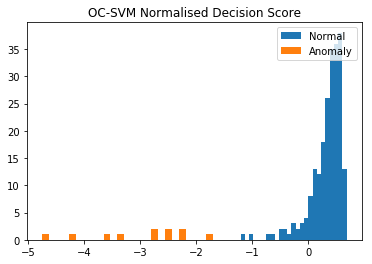

In [6]:
##create the classifier
from src.models.ocsvmSklearn import OCSVM
ocsvm = OCSVM()
nu= 0.04
kernel = 'rbf'
clf = ocsvm.fit(X_Pos,nu,kernel)
res = ocsvm.score(clf,Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)

### OC-NN


Training the OCNN classifier.....
Training OC-NN started for epochs:  100
Epoch = 1, r = -566.405496, Cost = 18809752.000000
Epoch = 2, r = -565.850132, Cost = 18769572.000000
Epoch = 3, r = -565.294673, Cost = 18729436.000000
Epoch = 4, r = -564.739231, Cost = 18689348.000000
Epoch = 5, r = -564.183911, Cost = 18649310.000000
Epoch = 6, r = -563.628699, Cost = 18609318.000000
Epoch = 7, r = -563.073423, Cost = 18569374.000000
Epoch = 8, r = -562.518223, Cost = 18529482.000000
Epoch = 9, r = -561.963223, Cost = 18489644.000000
Epoch = 10, r = -561.422817, Cost = 18449850.000000
Epoch = 11, r = -560.890002, Cost = 18410110.000000
Epoch = 12, r = -560.357217, Cost = 18370422.000000
Epoch = 13, r = -559.824661, Cost = 18330788.000000
Epoch = 14, r = -559.292102, Cost = 18291210.000000
Epoch = 15, r = -558.759758, Cost = 18251682.000000
Epoch = 16, r = -558.227505, Cost = 18212212.000000
Epoch = 17, r = -557.695342, Cost = 18172798.000000
Epoch = 18, r = -557.163330, Cost = 18133436.000000

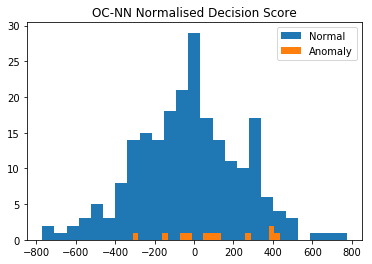

In [3]:
##create the classifier
## Instantiate the object and call the function
from src.models.ocnn import OCNN
ocnn = OCNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,nu,activation,epochs)
res = ocnn.score(Xtest_Pos,Xtest_Neg) 
print("="*35)
print("AUC:",res)
print("="*35)






### OC-NN WITH FAKENOISE

Training the OCNN classifier.....
X_trainNeg: (220, 256)
Training OC-NN started for epochs:  100
Epoch = 1, r = -501.361133, Cost = 18837766.000000
Epoch = 2, r = -500.858322, Cost = 18797554.000000
Epoch = 3, r = -500.355557, Cost = 18757388.000000
Epoch = 4, r = -499.852760, Cost = 18717272.000000
Epoch = 5, r = -499.350117, Cost = 18677202.000000
Epoch = 6, r = -498.847373, Cost = 18637180.000000
Epoch = 7, r = -498.344836, Cost = 18597208.000000
Epoch = 8, r = -497.842358, Cost = 18557284.000000
Epoch = 9, r = -497.339858, Cost = 18517418.000000
Epoch = 10, r = -496.837417, Cost = 18477596.000000
Epoch = 11, r = -496.335190, Cost = 18437824.000000
Epoch = 12, r = -495.832985, Cost = 18398108.000000
Epoch = 13, r = -495.330970, Cost = 18358442.000000
Epoch = 14, r = -494.828945, Cost = 18318834.000000
Epoch = 15, r = -494.327189, Cost = 18279278.000000
Epoch = 16, r = -493.825460, Cost = 18239776.000000
Epoch = 17, r = -493.323929, Cost = 18200332.000000
Epoch = 18, r = -492.822489,

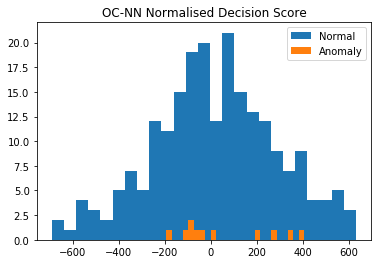

In [4]:
## Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_TrainingData(X_Pos)

##create the classifier
## Instantiate the object and call the function
from src.models.ocnnFakeNoise import OCNNFakeNoiseNN
ocnn = OCNNFakeNoiseNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,X_Neg,nu,activation,epochs)
print(X_Neg.shape)
## Testing the OC-NN with Fake Noise
res = ocnn.score(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)



### Experiments by changing the loss functions

## Experiment-1 with (1/nu) term
term5 = 1/nu * tf.reduce_sum( tf.maximum(0.0, 1.0 + nnScore(Xneg, w, V, g,bias1,bias2)))


## Experiment-2 with (1/nu) and plus r term
term5 = 1/nu * tf.reduce_sum( tf.maximum(0.0, r + nnScore(Xneg, w, V, g,bias1,bias2)))

## Experiment 1

Training the OCNN classifier.....
X_trainNeg: (220, 256)
Training OC-NN started for epochs:  100
Epoch = 1, r = -501.361133, Cost = 19557384.000000
Epoch = 2, r = -500.858322, Cost = 19516398.000000
Epoch = 3, r = -500.355542, Cost = 19475458.000000
Epoch = 4, r = -499.852760, Cost = 19434566.000000
Epoch = 5, r = -499.350078, Cost = 19393722.000000
Epoch = 6, r = -498.847373, Cost = 19352926.000000
Epoch = 7, r = -498.344783, Cost = 19312180.000000
Epoch = 8, r = -497.842268, Cost = 19271482.000000
Epoch = 9, r = -497.339766, Cost = 19230836.000000
Epoch = 10, r = -496.837380, Cost = 19190242.000000
Epoch = 11, r = -496.335144, Cost = 19149698.000000
Epoch = 12, r = -495.833138, Cost = 19109210.000000
Epoch = 13, r = -495.331145, Cost = 19068772.000000
Epoch = 14, r = -494.829434, Cost = 19028390.000000
Epoch = 15, r = -494.327783, Cost = 18988062.000000
Epoch = 16, r = -493.826267, Cost = 18947788.000000
Epoch = 17, r = -493.324904, Cost = 18907570.000000
Epoch = 18, r = -492.823752,

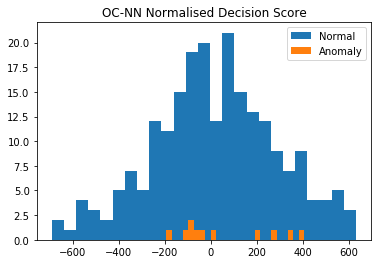

In [3]:
## Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_TrainingData(X_Pos)


##create the classifier
## Instantiate the object and call the function
from src.models.ocnnFakeNoise import OCNNFakeNoiseNN
ocnn = OCNNFakeNoiseNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,X_Neg,nu,activation,epochs)
print(X_Neg.shape)
## Testing the OC-NN with Fake Noise
res = ocnn.score(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)


 ## With r = 1

Training the OCNN classifier.....
Training OC-NN started for epochs:  10
Epoch = 1, Cost = 18809422.000000
Epoch = 2, Cost = 18769242.000000
Epoch = 3, Cost = 18729106.000000
Epoch = 4, Cost = 18689020.000000
Epoch = 5, Cost = 18648982.000000
Epoch = 6, Cost = 18608988.000000
Epoch = 7, Cost = 18569046.000000
Epoch = 8, Cost = 18529154.000000
Epoch = 9, Cost = 18489316.000000
Epoch = 10, Cost = 18449524.000000
Saving ON-NN Trained Model weights @ ../models/ocnn/
(220, 256)
Loading ON-NN Trained Model weights @  ../models/ocnn/
AUC: 0.46280991735537197


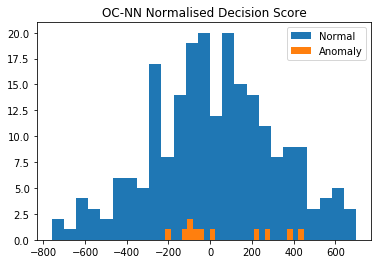

In [19]:
#### Fake Noise data to be generated which will be added to the training set before training
X_Neg,X_NegLabel = createData.get_FAKE_Noise_TrainingData(X_Pos)


##create the classifier
## Instantiate the object and call the function
from src.models.ocnnFakeNoise import OCNNFakeNoiseNN
ocnn = OCNNFakeNoiseNN()

nu= 0.04
activation = 'sigmoid'
epochs = 10
ocnn.fit(X_Pos,X_Neg,nu,activation,epochs)
print(X_Neg.shape)
## Testing the OC-NN with Fake Noise
res = ocnn.score(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)